## Import

In [1]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

In [53]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [54]:
from sklearn import metrics 
def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(0,14): # ignore 'ID'
        rmse = metrics.mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:14])
    return score

## Data Load

In [55]:
train_df = pd.read_csv('./train.csv')
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(train_df, train_size=0.8)

In [26]:
# # 파생변수 생성


In [56]:
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

valid_x = valid_df.filter(regex='X') # Input : X Featrue
valid_y = valid_df.filter(regex='Y') # Output : Y Feature

## Regression Model Fit

In [28]:
group_dict = {
    "Group_1" : ["X_01", "X_02", "X_05", "X_06"],
    "Group_2" : ["X_03", "X_10", "X_11"],
    "Group_3" : ["X_04", "X_23", "X_47", "X_48"],
    "Group_4" : ["X_07", "X_08", "X_09"],
    "Group_5" : ["X_12"],
    "Group_6" : ["X_13"],
    "Group_7" : ["X_14", "X_15", "X_16", "X_17", "X_18"],
    "Group_8" : ["X_19", "X_20", "X_21", "X_22"],
    "Group_9" : ["X_24", "X_25", "X_26", "X_27", "X_28", "X_29"],
    "Group_10" : ["X_30", "X_31", "X_32", "X_33"],
    "Group_11" : ["X_34", "X_35", "X_36", "X_37"],
    "Group_12" : ["X_38", "X_39", "X_40"],
    "Group_13" : ["X_41", "X_42", "X_43", "X_44"],
    "Group_14" : ["X_45"],
    "Group_15" : ["X_46"],
    "Group_16" : ["X_49"],
    "Group_17" : ["X_50", "X_51", "X_52", "X_53", "X_54", "X_55", "X_56"],
}

In [34]:
print(train_x)

         X_01    X_02   X_03  X_04     X_05    X_06   X_07     X_08    X_09  \
8562   68.504  103.32  70.97     1  101.841  69.884  33.87   107.77  287.03   
29946  65.445  103.32  62.57     1  102.085  66.825  29.50   101.44  188.88   
26874  67.485  103.32  79.97     1  102.052  69.884  28.87   103.26  211.26   
28001  66.465  103.32  68.57     1  101.952  72.943  26.91   109.88  238.38   
35013  65.445  103.32  61.97     1  102.072  65.805  28.70   113.82  263.12   
...       ...     ...    ...   ...      ...     ...    ...      ...     ...   
23922  67.485  103.32  67.97     1  101.965  72.943  26.00  1400.30   37.58   
38999  68.504  103.32  64.67     1  103.151  68.864  29.67   111.28  244.35   
31084  67.485  103.32  75.97     1  102.011  68.864  29.11    80.39  233.70   
4013   68.504  103.32  73.47     1  101.947  72.943  31.92   111.89  101.92   
8755   69.524  103.32  68.47     1  103.158  69.884  28.81   102.37  243.03   

       X_10  ...   X_40   X_41   X_42   X_43   X_44

In [29]:
extract_Group = []
scores = []
now_model = []
for i in range(0,18):
    if i >= 1:
        train_x = train_df.filter(regex='X').drop(columns=group_dict['Group_%d'%i])
        valid_x = valid_df.filter(regex='X').drop(columns=group_dict['Group_%d'%i])
    LR = MultiOutputRegressor(LinearRegression()).fit(train_x, train_y)
    valid_preds = LR.predict(valid_x)
    score = lg_nrmse(valid_y.values,np.round(valid_preds,2))
    extract_Group.append('Group_%d'%i)
    scores.append(score)
    now_model.append(LR)

    print("현재 제외된 그룹",'Group_%d'%i,"------현재 모델",LR,'-----리더보드 스코어  ',score)
print('Done.')

현재 제외된 그룹 Group_0 ------현재 모델 MultiOutputRegressor(estimator=LinearRegression()) -----리더보드 스코어   1.9511453506841216
현재 제외된 그룹 Group_1 ------현재 모델 MultiOutputRegressor(estimator=LinearRegression()) -----리더보드 스코어   1.9528661279650337
현재 제외된 그룹 Group_2 ------현재 모델 MultiOutputRegressor(estimator=LinearRegression()) -----리더보드 스코어   1.9518695158597206
현재 제외된 그룹 Group_3 ------현재 모델 MultiOutputRegressor(estimator=LinearRegression()) -----리더보드 스코어   1.9511453506841216
현재 제외된 그룹 Group_4 ------현재 모델 MultiOutputRegressor(estimator=LinearRegression()) -----리더보드 스코어   1.9514004578070594
현재 제외된 그룹 Group_5 ------현재 모델 MultiOutputRegressor(estimator=LinearRegression()) -----리더보드 스코어   1.9516857612752934
현재 제외된 그룹 Group_6 ------현재 모델 MultiOutputRegressor(estimator=LinearRegression()) -----리더보드 스코어   1.9511141751591887
현재 제외된 그룹 Group_7 ------현재 모델 MultiOutputRegressor(estimator=LinearRegression()) -----리더보드 스코어   1.9555354695733382
현재 제외된 그룹 Group_8 ------현재 모델 MultiOutputRegressor(estimator=LinearRegre

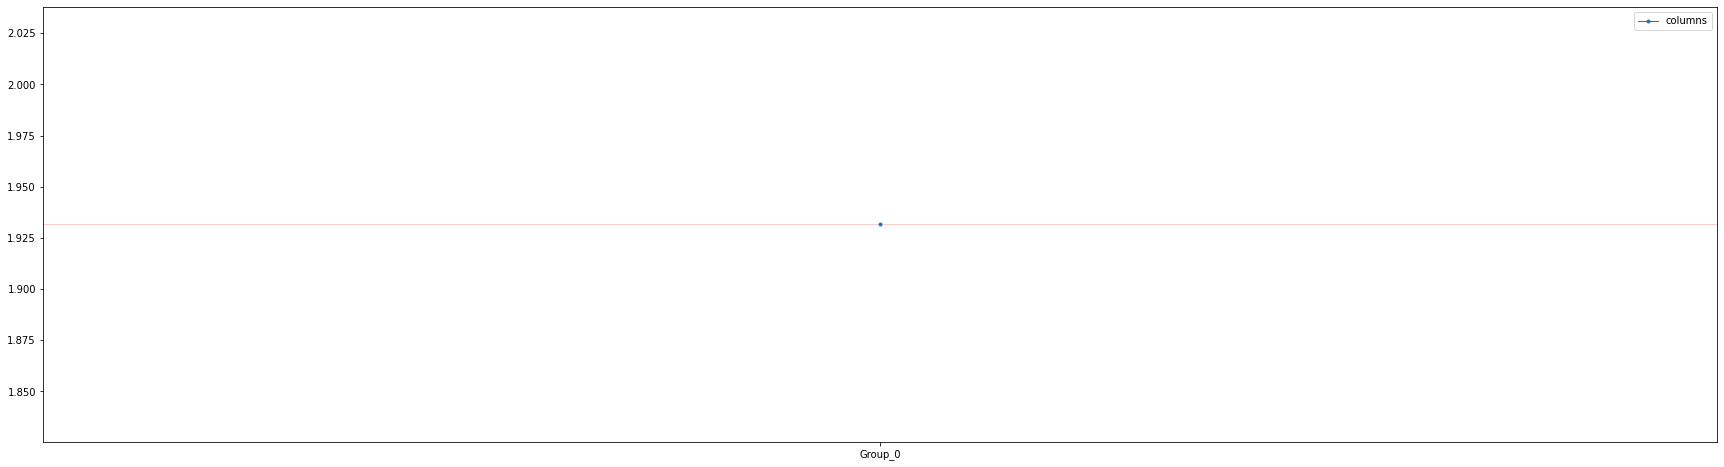

In [78]:
import matplotlib.pyplot as plt
result_LR = pd.DataFrame()

result_LR["제외된 컬럼"] = extract_Group
result_LR["현재 모델"] = now_model
result_LR["리더보드 스코어"] = scores
xs = result_LR["제외된 컬럼"].to_list()
ys = result_LR["리더보드 스코어"].to_list()
plt.figure(figsize=(30, 8))
plt.plot(xs, ys, 'o-', ms=3, lw=1, label='columns')
plt.axhspan(ymin=min(ys), ymax=ys[0], alpha=0.2, color='red')
plt.legend()
# X_00는 아무것도 제거하지 않았을때이다.

## xgb Model Fit

In [47]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
# 출처: https://eehoeskrap.tistory.com/498 [Enough is not enough:티스토리]

In [48]:
import xgboost as xgb
extract_Group = []
scores = []
now_model = []
for i in range(0,1):
    if i >= 1:
        train_x = train_df.filter(regex='X').drop(columns=group_dict['Group_%d'%i])
        valid_x = valid_df.filter(regex='X').drop(columns=group_dict['Group_%d'%i])
    XGB = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma = 0, subsample=0.75, colsample_bytree = 1, max_depth=7)).fit(train_x, train_y)
    valid_preds = XGB.predict(valid_x)
    score = lg_nrmse(valid_y.values,valid_preds)
    extract_Group.append('Group_%d'%i)
    scores.append(score)
    now_model.append(XGB)

    print("현재 제외된 그룹",'Group_%d'%i,"------현재 모델",XGB,'-----리더보드 스코어  ',score)
print('Done.')

현재 제외된 그룹 Group_0 ------현재 모델 MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.08, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=Non

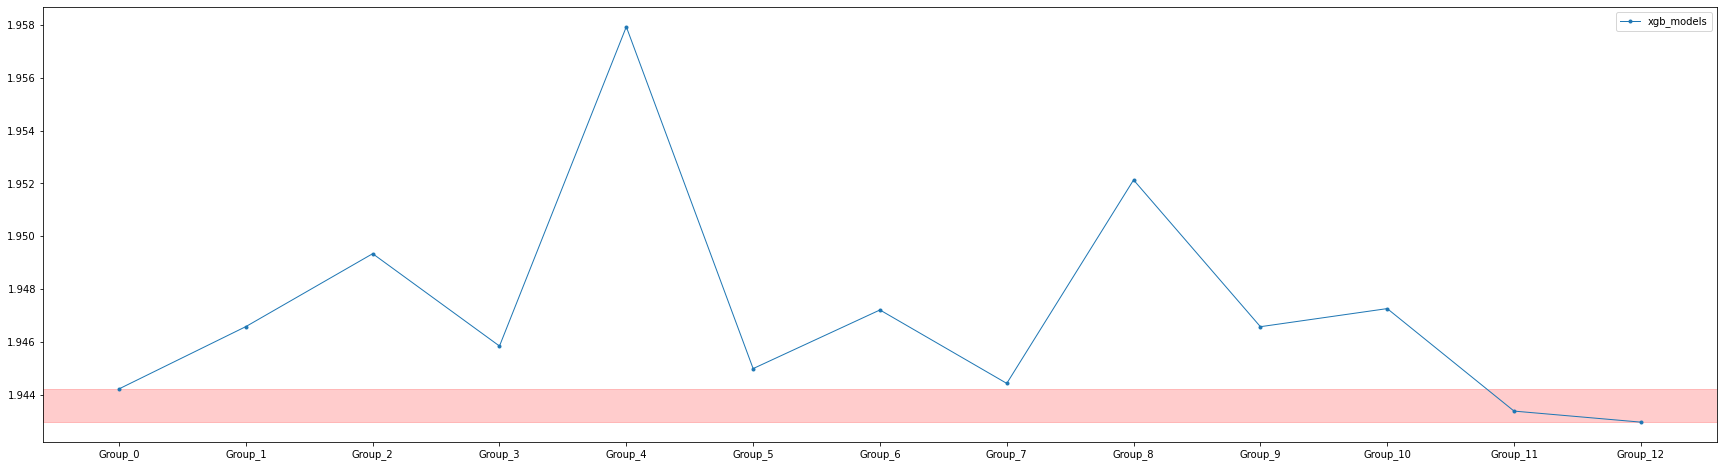

In [49]:
import matplotlib.pyplot as plt
result_xgb = pd.DataFrame()

result_xgb["제외된 컬럼"] = extract_Group
result_xgb["현재 모델"] = now_model
result_xgb["리더보드 스코어"] = scores
xs = result_xgb["제외된 컬럼"].to_list()
ys = result_xgb["리더보드 스코어"].to_list()
plt.figure(figsize=(30, 8))
plt.plot(xs, ys, 'o-', ms=3, lw=1, label='xgb_models')

plt.axhspan(ymin=min(ys), ymax=ys[0], alpha=0.2, color='red')
plt.legend()
# X_00는 아무것도 제거하지 않았을때이다.

In [40]:
test_x = pd.read_csv('./test.csv').drop(columns=['ID'])

In [44]:

test_x = test_x.drop(columns=["X_50", "X_51", "X_52", "X_53", "X_54", "X_55", "X_56"])

preds = XGB.predict(test_x)
print('Done.')

Done.


## lightgbm Model Fit

In [ ]:
!pip install lightgbm

In [59]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, train_x, train_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 1.133 (0.207)


## Submit

In [62]:
valid_preds = wrapper.predict(valid_x)
score = lg_nrmse(valid_y.values,valid_preds)

NotFittedError: This MultiOutputRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [45]:
submit = pd.read_csv('./sample_submission.csv')

In [46]:

for idx, col in enumerate(submit.columns):
    if col=='ID':
        continue
    submit[col] = preds[:,idx-1]
print('Done.')

Done.


In [47]:
submit.to_csv('./submit.csv', index=False)